<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 3.4MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=c27abb58b98ed75cedce4c0570ebfd746e712d2525fdf4db0a282cb815ec8132
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [2]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [4]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [5]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [6]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [7]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [8]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 10 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 itens and each item itself list of 10 values 
    and S_actual, I_actual, R_actual are list of S, I, R respectively for (day +1) value for each of 10 days for each of 1000 rows   """

S_list = []
S_actual = []
I_list = []
I_actual = []
R_list = []
R_actual = []
for i in range(1000):
  p = sample(range(0, 99), 10)
  S_list.append(S_value[p].iloc[i].to_list())
  S_actual.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_actual.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_actual.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [9]:
""" merging 1000 lists each of 10 items into a single list of 10000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susactual_list = []
for i in range(1000):
 susactual_list = susactual_list+S_actual[i]

infectedactual_list = []
for i in range(1000):
 infectedactual_list = infectedactual_list+I_actual[i]  

recovactual_list = []
for i in range(1000):
 recovactual_list = recovactual_list+R_actual[i]


In [10]:
""" list to dataframe """

df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susactual_list)
df_5 = pd.DataFrame(infectedactual_list)
df_6 = pd.DataFrame(recovactual_list)

In [11]:
""" merging all dataframes into a single dataframe """

data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6], axis=1)
data.columns = range(data.shape[1])
data.head()

,0,1,2,3,4,5
0,203.280326,6.352573e-01,796.084417,203.131018,4.171840e-01,796.451798
1,202.845900,-3.684119e-10,797.154100,202.845900,-4.070740e-10,797.154100
2,202.845900,7.224655e-08,797.154100,202.845900,4.633272e-08,797.154100
3,202.845900,3.051092e-08,797.154100,202.845900,1.962847e-08,797.154100
4,202.847096,1.753156e-03,797.151150,202.846685,1.150750e-03,797.152164


In [12]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [13]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5
0,5.456562e-04,4.127013e-03,0.998658,3.581225e-04,2.710278e-03,0.999119
1,2.946532e-13,6.995396e-13,1.000000,2.688960e-13,4.483282e-13,1.000000
2,6.255529e-11,4.724499e-10,1.000000,4.034428e-11,3.040982e-10,1.000000
3,2.677086e-11,2.013102e-10,1.000000,1.744771e-11,1.306113e-10,1.000000
4,1.503177e-06,1.138956e-05,0.999996,9.866733e-07,7.475970e-06,0.999998
...,...,...,...,...,...,...
9995,8.111289e-13,2.815986e-12,1.000000,8.195111e-13,2.823029e-12,1.000000
9996,3.656353e-12,2.437458e-11,1.000000,2.519318e-12,1.570258e-11,1.000000
9997,1.831590e-12,1.054828e-11,1.000000,1.439737e-12,7.523065e-12,1.000000
9998,5.530798e-12,3.857703e-11,1.000000,3.663791e-12,2.437455e-11,1.000000


In [14]:
X = data_scaled[[0,1,2]]
y = data_scaled[[3,4,5]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
# load the dataset
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(3, activation='relu'))
# compile the keras model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)



Using TensorFlow backend.



Epoch 00001: val_accuracy improved from -inf to 0.91812, saving model to weights-improvement-01-0.92.hdf5


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '



Epoch 00002: val_accuracy did not improve from 0.91812

Epoch 00003: val_accuracy did not improve from 0.91812

Epoch 00004: val_accuracy did not improve from 0.91812

Epoch 00005: val_accuracy did not improve from 0.91812

Epoch 00006: val_accuracy did not improve from 0.91812

Epoch 00007: val_accuracy did not improve from 0.91812

Epoch 00008: val_accuracy did not improve from 0.91812

Epoch 00009: val_accuracy did not improve from 0.91812

Epoch 00010: val_accuracy did not improve from 0.91812

Epoch 00011: val_accuracy did not improve from 0.91812

Epoch 00012: val_accuracy did not improve from 0.91812

Epoch 00013: val_accuracy did not improve from 0.91812

Epoch 00014: val_accuracy did not improve from 0.91812

Epoch 00015: val_accuracy did not improve from 0.91812

Epoch 00016: val_accuracy did not improve from 0.91812

Epoch 00017: val_accuracy improved from 0.91812 to 0.98687, saving model to weights-improvement-17-0.99.hdf5

Epoch 00018: val_accuracy did not improve from 0.

In [16]:
predicted_y = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicted_y)

0.000825535909935593

In [18]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2000/2000 [==============================] - 0s 24us/step
Accuracy: 98.80


In [19]:
y_pred1 = model.predict(X_train)
y_pred2 = model.predict(X_test)
df_7 = pd.DataFrame(y_pred1)
df_8 = pd.DataFrame(y_pred2)

In [20]:
y_test.head()

,3,4,5
6252,1.949008e-09,1.476931e-08,1.000000
4684,1.558646e-05,1.180921e-04,0.999962
1731,1.807554e-05,1.369497e-04,0.999956
4742,9.859388e-01,4.263747e-02,0.007069
4521,4.326260e-06,3.277949e-05,0.999989


In [21]:
df_8.head()

,0,1,2
0,0.000000,0.0,0.992127
1,0.000000,0.0,0.992088
2,0.000000,0.0,0.992074
3,1.036972,0.0,0.001504
4,0.000000,0.0,0.992115


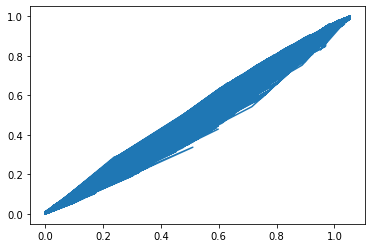

In [22]:
#plot of S_pred1 vs s_actual1                
#pred1 corresponds to prediction on training sets , where as actual1 corresponds actual value(y_train)
plt.figure(figsize=(6,4))
plt.plot(df_7[0],y_train[3])                                   

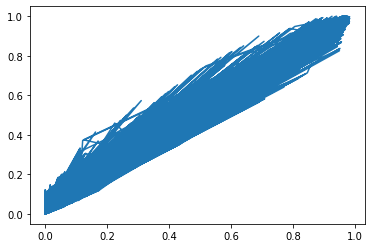

In [23]:
#plot of I_pred1 vs I_actual1
plt.figure(figsize=(6,4))
plt.plot(df_7[1],y_train[4])    

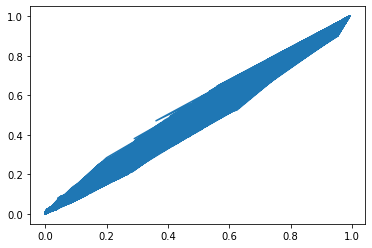

In [24]:
plt.figure(figsize=(6,4))
plt.plot(df_7[2],y_train[5])    #plot of R_pred1 vs R_actual1

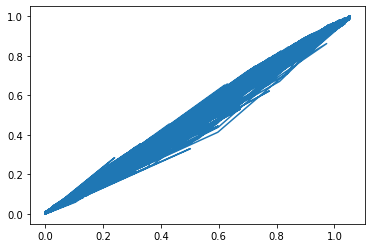

In [25]:
#plot of S_pred2 vs S_actual2
#pred2 corresponds to prediction on test sets , where as actual2 corresponds actual value(y_test)
plt.figure(figsize=(6,4))
plt.plot(df_8[0],y_test[3])    

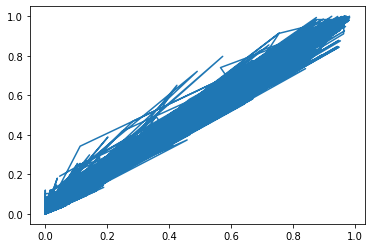

In [26]:
plt.figure(figsize=(6,4))
plt.plot(df_8[1],y_test[4])    #plot of I_pred2 vs I_actual2

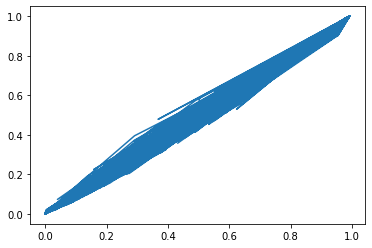

In [27]:
plt.figure(figsize=(6,4))
plt.plot(df_8[2],y_test[5])    #plot of R_pred2 vs R_actual2

In [29]:
comp_data = pd.DataFrame()

In [31]:
k = 0
for i in range(100):
  comp_data[k] = S_value[i]
  comp_data[k+1] = I_value[i]
  comp_data[k+2] = R_value[i]
  k = k+3

In [32]:
comp_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,999.0,1.0,0.0,996.945329,2.025248,1.029423,992.805777,4.084360,3.109863,984.544577,8.167622,7.287802,968.365030,16.062137,15.572833,937.807818,30.587314,31.604868,883.830886,54.924595,61.244519,798.693908,89.417593,111.888499,685.137264,126.294947,188.567789,561.849546,150.390115,287.760339,452.407200,151.506739,396.086061,369.175520,133.083186,497.741294,311.560123,105.858657,582.581220,273.466944,...,797.154100,202.845900,-3.430059e-10,797.154100,202.845900,-2.723097e-10,797.154100,202.845900,-2.315339e-10,797.154100,202.845900,-2.056113e-10,797.154100,202.845900,-1.796888e-10,797.154100,202.845900,-1.537662e-10,797.154100,202.845900,-1.278437e-10,797.154100,202.845900,-1.019211e-10,797.154100,202.845900,-7.599861e-11,797.154100,202.845900,-6.119544e-11,797.154100,202.845900,-6.034414e-11,797.154100,202.845900,-5.949284e-11,797.154100,202.845900,-5.864153e-11,797.154100
1,999.0,1.0,0.0,997.399340,1.798887,0.801774,994.530061,3.227712,2.242227,989.414148,5.764962,4.820890,980.378762,10.213343,9.407895,964.685001,17.838421,17.476577,938.196207,30.405955,31.397838,895.561183,49.786699,54.652117,831.853156,76.597421,91.549423,746.275269,107.894603,145.830127,645.857464,136.054563,218.087973,544.178489,152.082771,303.738740,454.273472,151.698827,394.027701,382.684944,...,797.154100,202.845900,1.486436e-09,797.154100,202.845900,1.055991e-09,797.154100,202.845900,7.531250e-10,797.154100,202.845900,4.880320e-10,797.154100,202.845900,1.885695e-10,797.154100,202.845900,-5.536169e-11,797.154100,202.845900,-2.437617e-10,797.154100,202.845900,-3.766305e-10,797.154100,202.845900,-4.539680e-10,797.154100,202.845900,-4.757743e-10,797.154100,202.845900,-4.420494e-10,797.154100,202.845900,-3.527932e-10,797.154100,202.845900,-3.840916e-10,797.154100
2,999.0,1.0,0.0,996.174292,2.409436,1.416272,989.425587,5.759303,4.815109,973.627364,13.509570,12.863066,938.310592,30.352526,31.336881,866.813010,62.221241,70.965748,746.759757,107.734614,145.505628,594.861210,145.925458,259.213332,454.827010,151.754174,393.418816,354.349547,127.414985,518.235468,291.672182,92.765688,615.562130,254.692129,61.958228,683.349643,233.178103,39.345788,727.476109,220.651545,...,797.154100,202.845900,-5.057097e-11,797.154100,202.845900,-4.950949e-11,797.154100,202.845900,-4.844801e-11,797.154100,202.845900,-4.738654e-11,797.154100,202.845900,-4.632506e-11,797.154100,202.845900,-4.526358e-11,797.154100,202.845900,-4.420211e-11,797.154100,202.845900,-4.314063e-11,797.154100,202.845900,-4.207916e-11,797.154100,202.845900,-4.101768e-11,797.154100,202.845900,-3.995620e-11,797.154100,202.845900,-3.889473e-11,797.154100,202.845900,-3.783325e-11,797.154100
3,999.0,1.0,0.0,998.631862,1.183851,0.184287,998.196246,1.401313,0.402441,997.680899,1.658454,0.660647,997.071388,1.962408,0.966204,996.350729,2.321548,1.327723,995.498969,2.745686,1.755346,994.492693,3.246293,2.261014,993.304479,3.836753,2.858768,991.902281,4.532627,3.565092,990.248743,5.351951,4.399306,988.300449,6.315537,5.384015,986.007127,7.447275,6.545598,983.310815,...,790.181400,205.421477,3.733062e+00,790.845461,205.174681,3.378791e+00,791.446528,204.951571,3.057897e+00,791.990532,204.749867,2.767281e+00,792.482852,204.567509,2.504122e+00,792.928369,204.402637,2.265855e+00,793.331507,204.253572,2.050151e+00,793.696277,204.118794,1.854892e+00,794.026313,203.996932,1.678157e+00,794.324911,203.886746,1.518202e+00,794.595052,203.787115,1.373445e+00,794.839440,203.697028,1.242450e+00,795.060523,203.615568,1.123916e+00,795.260516
4,999.0,1.0,0.0,997.068806,1.963695,0.967499,993.294420,3.841749,2.863832,985.978045,7.461609,6.560346,972.018707,14.291429,13.689864,946.169157,26.664137,27.166707,900.828286,47.451654,51.720060,828.281199,78.017768,93.701033

In [38]:
from sklearn import preprocessing
float_array = comp_data[0:1000].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [39]:
comp_data = pd.DataFrame(scaled_array)
comp_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.0,0.0,0.0,0.399362,0.601051,0.600227,0.506850,0.494753,0.491570,0.600904,0.403687,0.394682,0.669898,0.341892,0.319448,0.703238,0.326534,0.273424,0.690449,0.387633,0.262921,0.625468,0.578142,0.291965,0.516450,0.819300,0.359511,0.389364,0.976877,0.456434,0.273638,0.984176,0.566080,0.184513,0.863689,0.671155,0.122152,0.685647,0.760594,0.080413,...,1.000000,2.061684e-13,8.640657e-13,1.000000,2.748357e-13,1.326970e-12,1.000000,3.205214e-13,1.587084e-12,1.000000,3.523848e-13,1.755469e-12,1.000000,3.868017e-13,1.922980e-12,1.000000,4.198863e-13,2.094079e-12,1.000000,4.526379e-13,2.255166e-12,1.000000,4.850009e-13,2.430314e-12,1.000000,5.165313e-13,2.599349e-12,1.000000,5.438983e-13,2.695354e-12,1.000000,5.521139e-13,2.699181e-12,1.000000,5.628276e-13,2.706616e-12,1.000000,5.713208e-13,2.710931e-12,1.000000
1,0.0,0.0,0.0,0.532270,0.468159,0.467304,0.644257,0.357211,0.354296,0.735428,0.268285,0.261002,0.799399,0.209080,0.192938,0.833615,0.185799,0.151167,0.836594,0.211354,0.134772,0.806609,0.318975,0.142597,0.742504,0.494299,0.174531,0.646996,0.698970,0.231300,0.530726,0.883123,0.311678,0.411115,0.987942,0.409553,0.304403,0.985435,0.514419,0.218850,...,1.000000,1.591227e-12,1.276206e-11,1.000000,1.230016e-12,9.977162e-12,1.000000,9.809931e-13,7.986373e-12,1.000000,7.632228e-13,6.261904e-12,1.000000,5.186407e-13,4.315408e-12,1.000000,3.201883e-13,2.733388e-12,1.000000,1.691425e-13,1.502045e-12,1.000000,6.533662e-14,6.456374e-13,1.000000,8.271162e-15,1.435941e-13,1.000000,4.274359e-15,1.572522e-15,1.000000,4.068967e-14,2.190211e-13,1.000000,1.271760e-13,8.010680e-13,1.000000,1.081357e-13,5.957682e-13,1.000000
2,0.0,0.0,0.0,0.173646,0.826601,0.826108,0.237486,0.763678,0.761367,0.299311,0.704733,0.696799,0.345927,0.666392,0.642939,0.358854,0.675741,0.614027,0.321974,0.767316,0.624703,0.244302,0.947676,0.676434,0.161599,0.985793,0.750092,0.099500,0.826627,0.822022,0.060027,0.600026,0.879763,0.036274,0.398548,0.921437,0.022054,0.250662,0.949769,0.013468,...,1.000000,6.706857e-13,2.765951e-12,1.000000,6.795675e-13,2.777896e-12,1.000000,6.912249e-13,2.776957e-12,1.000000,7.017165e-13,2.783418e-12,1.000000,7.149281e-13,2.789391e-12,1.000000,7.265855e-13,2.798993e-12,1.000000,7.380763e-13,2.798587e-12,1.000000,7.491230e-13,2.812187e-12,1.000000,7.592815e-13,2.819732e-12,1.000000,7.748802e-13,2.826462e-12,1.000000,7.833179e-13,2.831653e-12,1.000000,7.941425e-13,2.840440e-12,1.000000,8.029133e-13,2.846168e-12,1.000000
3,0.0,0.0,0.0,0.893081,0.107083,0.106756,0.936413,0.063968,0.063212,0.963800,0.036862,0.035563,0.979336,0.021722,0.019708,0.987220,0.014508,0.011426,0.990636,0.012488,0.007499,0.991610,0.014623,0.005874,0.991261,0.018475,0.005428,0.990122,0.023016,0.005634,0.988409,0.028365,0.006267,0.986187,0.034657,0.007238,0.983452,0.042050,0.008523,0.980162,...,0.991252,3.236118e-03,2.427841e-02,0.992085,2.926040e-03,2.200344e-02,0.992839,2.645720e-03,1.987325e-02,0.993521,2.392294e-03,1.797836e-02,0.994139,2.163174e-03,1.626828e-02,0.994698,1.956024e-03,1.472069e-02,0.995204,1.768733e-03,1.331986e-02,0.995662,1.599392e-03,1.205049e-02,0.996076,1.446278e-03,1.090338e-02,0.996450,1.307834e-03,9.864723e-03,0.996789,1.182652e-03,8.924067e-03,0.997096,1.069460e-03,8.072091e-03,0.997373,9.671079e-04,7.304545e-03,0.997624
4,0.0,0.0,0.0,0.435509,0.564915,0.564070,0.545790,0.455799,0.452644,0.640504,0.363899,0.355262,0.709282,0.301684,0.280808,0.743797,0.283226,0.235019,0.736141,0.333906,0.222027,0.680796,0.503592,0.244502,0.581434,0.738817,0.302561,0.456653,0.930829,0.391197,0.333593,0.999961,0.498152,0.231999,0.933540,0.607300,0.157195,0.782205,0.705490,0.105388,...,1.000000,1.016409e-13,4.162109e-13,1.000000,9.880985e-14,3.360184e-13,1.000000,1.159073e-13,3.811510e-13,1.000000,

In [54]:
pred_data = {}
k = 3
for i in range(99):
  pred_data["group" + str(i)] = pd.DataFrame(model.predict(comp_data[[k,k+1,k+2]]))
  k = k+3

In [56]:
 predicted_data = pd.DataFrame()
 for i in range(99):
   predicted_data = pd.concat([predicted_data,pred_data["group" + str(i)]],axis = 1)

In [57]:
predicted_data

,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,...,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2
0,0.197646,0.789431,0.689500,0.233198,0.915769,0.633680,0.443229,0.981047,0.416580,0.618969,0.841319,0.273897,0.664334,0.769235,0.238845,0.655104,0.783901,0.245976,0.598252,0.874237,0.289904,0.463838,0.973591,0.398242,0.326195,0.956129,0.535658,0.222357,0.877245,0.650701,0.169515,0.689463,0.733670,0.119654,0.512278,0.811956,0.076976,0.360613,0.878967,0.039190,...,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127
1,0.253233,0.940594,0.609894,0.556249,0.905284,0.323758,0.694468,0.721353,0.215561,0.775550,0.571597,0.157894,0.823427,0.460459,0.129253,0.830974,0.442940,0.124738,0.790522,0.536843,0.148938,0.708521,0.699024,0.204703,0.598252,0.874237,0.289904,0.489948,0.954291,0.377197,0.363087,0.963983,0.498122,0.238831,0.935788,0.624835,0.192305,0.770452,0.697886,0.145675,...,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127
2,0.123805,0.527026,0.805440,0.144996,0.602332,0.772167,0.166191,0.677651,0.738889,0.184095,0.741275,0.710778,0.194578,0.778530,0.694317,0.194476,0.778166,0.694478,0.185416,0.745968,0.708704,0.156595,0.643551,0.753955,0.113127,0.489082,0.822205,0.069514,0.334098,0.890682,0.029269,0.191083,0.953871,0.026800,0.181659,0.955603,0.010867,0.120403,0.965238,0.000000,...,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127
3,0.898274,0.286715,0.084477,1.014467,0.016993,0.014967,1.017976,0.008849,0.012868,1.036972,0.000000,0.001504,1.052930,0.000000,0.000000,1.052930,0.000000,0.000000,1.052930,0.000000,0.000000,1.052930,0.000000,0.000000,1.050159,0.000000,0.000000,1.036972,0.000000,0.001504,1.036972,0.000000,0.001504,1.035048,0.000000,0.002655,1.021623,0.000382,0.010686,1.014858,...,0.984713,0.0,0.0,0.985411,0.0,0.0,0.986043,0.0,0.0,0.986630,0.0,0.0,0.987155,0.0,0.0,0.987628,0.0,0.0,0.988056,0.0,0.0,0.988444,0.0,0.0,0.988795,0.0,0.0,0.989112,0.0,0.0,0.989400,0.0,0.0,0.989660,0.0,0.0,0.989896,0.0,0.0,0.990108
4,0.209465,0.831432,0.670943,0.291651,0.948774,0.570805,0.554304,0.906722,0.325326,0.666011,0.766571,0.237549,0.712191,0.693192,0.201867,0.708395,0.699223,0.204800,0.640041,0.807836,0.257615,0.545856,0.912967,0.332135,0.400270,0.971900,0.460289,0.277170,0.945691,0.585539,0.200255,0.798704,0.685404,0.148616,0.615197,0.766483,0.102985,0.453041,0.838129,0.062762,...,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127,0.0,0.0,0.992127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.735692,0.655850,0.183709,0.839079,0.424126,0.119889,0.931553,0.209464,0.064568,1.014858,0.016087,0.014733,1.014858,0.016087,0.014733,1.015407,0.014813,0.014405,1.014858,0.016087,0.014733,1.003512,0.042424,0.021520,0.978733,0.099944,0.036344,0.973337,0.112471,0.039572,0.927320,0.219290,0.067101,0.883209,0.321687,0.093489,0.836007,0.431258,0.121727,0.777887,...,0.992125,0.0,0.0,0.992125,0.0,0.0,0.992126,0.0,0.0,0.992126,0.0,0.0,0.992126,0.0,0.0,0.992126,0.0,0.0,0.992126,0.0,0.0,0.992126,0.0,0.0,0.992126,0.0,0.0,0.9921